In [28]:
import pickle
import os
import pandas as pd
from create_models import get_absolute_path, logger
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
def load_model(city_name, variable, models_directory="models"):
    model_filename = f"{variable}.pkl"
    model_directory_city = os.path.join(models_directory, city_name)
    model_filepath = os.path.join(model_directory_city, model_filename)

    if os.path.exists(model_filepath):
        with open(model_filepath, 'rb') as f:
            model = pickle.load(f)
        return model
    else:
        logger.warning(f"Model for {variable} in {city_name} not found.")
        return None

In [30]:
def evaluate_model_performance(model, X, y):

    forecast = model.predict(X)
    y_pred = forecast['yhat']

    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    performance_metrics = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }

    return performance_metrics

In [31]:
def load_test_data(city_name, data_directory="data"):

    test_data_filename = f"{city_name}_weather.csv"
    test_data_filepath = os.path.join(data_directory, test_data_filename)
    test_df = pd.read_csv(test_data_filepath)

    column_mapping = {
        'date': 'ds',
        'temperature_2m': 'y_temp_2',
        'relative_humidity_2m': 'y_hum_2',
        'apparent_temperature': 'y_temp_a',
        'precipitation': 'y_precip',
        'rain': 'y_rain',
        'surface_pressure': 'y_press',
        'cloud_cover': 'y_cloud',
        'wind_speed_100m': 'y_w_speed',
        'wind_direction_100m': 'y_w_dir'
    }
    test_df = test_df.rename(columns=column_mapping)

    return test_df

In [42]:
def test_model_performance(model, city_name, variable):

    test_df = load_test_data(city_name)

    X_test = test_df[['ds']]
    y_test = test_df[f'y_{variable}']

    performance_metrics = evaluate_model_performance(model, X_test, y_test)

    return performance_metrics

In [43]:
city_name = "kyiv"
variable = "temp_2"

model = load_model(city_name, variable)

if model:
    performance_results = test_model_performance(model, city_name, variable)
    print(f"Performance metrics for {variable} in {city_name}: {performance_results}")
else:
    print(f"No model found for {variable} in {city_name}.")


Performance metrics for temp_2 in kyiv: {'MAE': 2.669360924796218, 'MSE': 11.475766530325952, 'R2': 0.8773639729206998}


In [44]:
city_name = "lviv"
variable = "hum_2"

model = load_model(city_name, variable)

if model:
    performance_results = test_model_performance(model, city_name, variable)
    print(f"Performance metrics for {variable} in {city_name}: {performance_results}")
else:
    print(f"No model found for {variable} in {city_name}.")


Performance metrics for hum_2 in lviv: {'MAE': 9.082851824629628, 'MSE': 127.46880842732634, 'R2': 0.49654436148233083}


In [47]:
city_name = "kharkiv"
variable = "w_speed"

model = load_model(city_name, variable)

if model:
    performance_results = test_model_performance(model, city_name, variable)
    print(f"Performance metrics for {variable} in {city_name}: {performance_results}")
else:
    print(f"No model found for {variable} in {city_name}.")


Performance metrics for w_speed in kharkiv: {'MAE': 6.787154958949469, 'MSE': 72.28786332723797, 'R2': 0.1562468160346645}


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

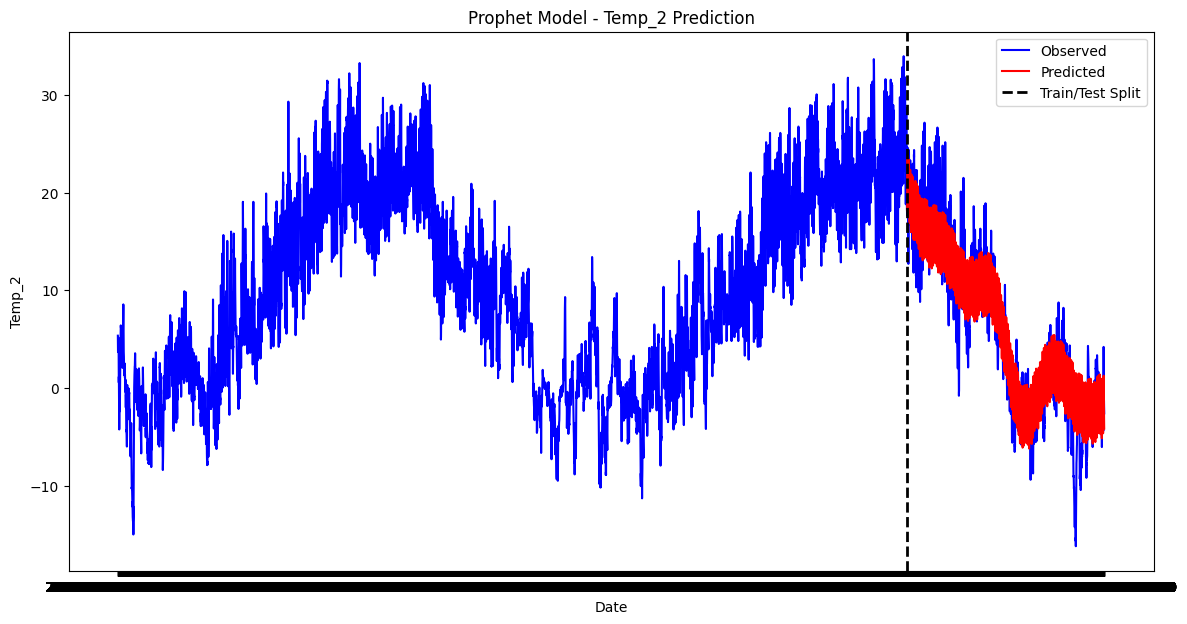

In [48]:
import matplotlib.pyplot as plt

def visualize_model_predictions(model, df, variable_to_visualize):
    column_name = f'y_{variable_to_visualize}'
    df_temp = df[['ds', column_name]].rename(columns={column_name: 'y'})
    for i in range(1, 6):
        df_temp[f'y_{variable_to_visualize}_lag_{i}'] = df_temp['y'].shift(i)
    df_temp = df_temp.dropna()
    train_size = int(len(df_temp) * 0.8)
    test = df_temp.iloc[train_size:]

    forecast = model.predict(df_temp.drop('y', axis=1))

    plt.figure(figsize=(14, 7))

    plt.plot(df_temp['ds'], df_temp['y'], label='Observed', color='blue')

    plt.plot(test['ds'], forecast['yhat'][train_size:], label='Predicted', color='red')

    plt.axvline(test['ds'].iloc[0], color='black', linestyle='--', linewidth=2, label='Train/Test Split')

    plt.xlabel('Date')
    plt.ylabel(f'{variable_to_visualize.capitalize()}')
    plt.title(f'Prophet Model - {variable_to_visualize.capitalize()} Prediction')

    plt.legend()

    plt.show()

city_name_example = "kyiv"
variable_example = "temp_2"
selected_model_example = load_model(city_name_example, variable_example)
visualize_model_predictions(selected_model_example, load_test_data(city_name_example), variable_example)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

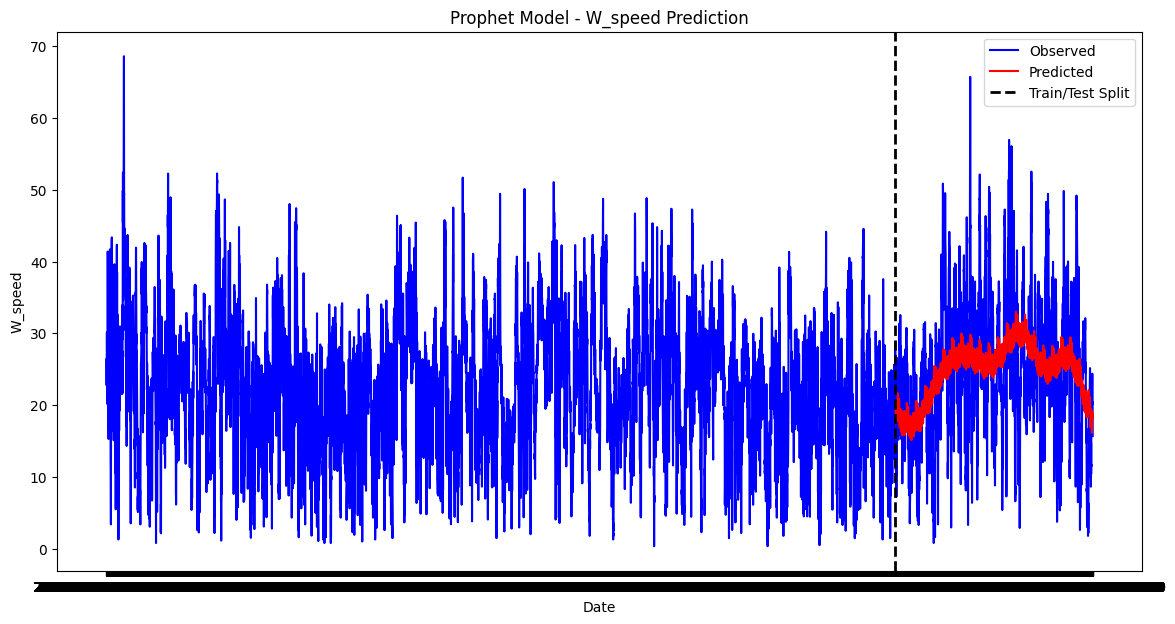

In [50]:
city_name_example = "kharkiv"
variable_example = "w_speed"
selected_model_example = load_model(city_name_example, variable_example)
visualize_model_predictions(selected_model_example, load_test_data(city_name_example), variable_example)